# Data Preparation Notebook

This notebook performs data preparation and exploratory analysis on the medicare dataset. It includes data loading, merging, summary statistics, and visualization steps.

# I. Environment Setup

In [2]:
import pandas as pd
import scripts as func
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns



# II. Medicare Dataset

## 1. DATA Descritpion

## 2. Load Datasets
This section loads raw data from various CSV files.

### 2.1 Load Medicare Data:

In [12]:
# Load DFC Facility Data
# Define the path to the data file
path_medicare = '../001_raw-data/MEDICARE/Medicare.csv'

df_medicare_raw = pd.read_csv(path_medicare, low_memory=False)
df_medicare_raw_COUNTY = df_medicare_raw[df_medicare_raw['BENE_GEO_LVL'] == 'County'].copy()
df_medicare_raw_CA = df_medicare_raw_COUNTY[df_medicare_raw_COUNTY['BENE_GEO_DESC'].str.startswith('CA-')].copy()
df_medicare_raw_CA['COUNTY'] = df_medicare_raw_CA['BENE_GEO_DESC'].str.split('-').str[1]
df_medicare = df_medicare_raw_CA.copy()

def medicare_filter(df, year_range, columns):
    years = range(year_range[0], year_range[1]+1)
    df = df[df['YEAR'].isin(years)]
    df = df[columns]
    return df

year_range = (2014, 2022)
columns = [
    'YEAR',
    'COUNTY',
    'OP_DLYS_MDCR_PYMT_AMT',
    'OP_DLYS_MDCR_PYMT_PCT',
    'OP_DLYS_MDCR_PYMT_PC',
    'OP_DLYS_MDCR_PYMT_PER_USER',
    'OP_DLYS_MDCR_STDZD_PYMT_AMT',
    'OP_DLYS_MDCR_STDZD_PYMT_PCT',
    'OP_DLYS_MDCR_STDZD_PYMT_PC',
    'OP_DLYS_MDCR_STDZD_PYMT_PER_USER',
    'BENES_OP_DLYS_CNT',
    'BENES_OP_DLYS_PCT',
    'OP_DLYS_VISITS_PER_1000_BENES',
    'BENE_AVG_AGE',
    'BENE_FEML_PCT',
    'BENE_MALE_PCT',
    'BENE_RACE_WHT_PCT',
    'BENE_RACE_BLACK_PCT',
    'BENE_RACE_HSPNC_PCT',
    'BENE_RACE_OTHR_PCT',
    'BENE_DUAL_PCT'
]

df_dial = medicare_filter(df_medicare, year_range, columns).copy()
df_dial.replace('*', np.nan, inplace=True)
df_dial['COUNTY'].replace('UNKNOWN', np.nan, inplace=True)
df_dial.head()

,YEAR,COUNTY,OP_DLYS_MDCR_PYMT_AMT,OP_DLYS_MDCR_PYMT_PCT,OP_DLYS_MDCR_PYMT_PC,OP_DLYS_MDCR_PYMT_PER_USER,OP_DLYS_MDCR_STDZD_PYMT_AMT,OP_DLYS_MDCR_STDZD_PYMT_PCT,OP_DLYS_MDCR_STDZD_PYMT_PC,OP_DLYS_MDCR_STDZD_PYMT_PER_USER,...,BENES_OP_DLYS_PCT,OP_DLYS_VISITS_PER_1000_BENES,BENE_AVG_AGE,BENE_FEML_PCT,BENE_MALE_PCT,BENE_RACE_WHT_PCT,BENE_RACE_BLACK_PCT,BENE_RACE_HSPNC_PCT,BENE_RACE_OTHR_PCT,BENE_DUAL_PCT
208,2014,Alameda,44860311.11,0.0423,473.67,32366.75,34809758.15,0.046,367.55,25115.27,...,0.0146,2090.8909,71,0.5428,0.4572,0.4848,0.1603,0.1196,0.2354,0.3397
209,2014,Alpine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,69,0.5699,0.4301,NaN,NaN,NaN,NaN,0.2694
210,2014,Amador,518681.43,0.0077,68.88,25934.07,438715.28,0.0084,58.26,21935.76,...,0.0027,437.8486,72,0.5278,0.4722,0.9284,0.0036,0.0408,0.0272,0.1251
211,2014,Butte,6445460.83,0.0156,147.62,24601,6033808.96,0.0172,138.19,23029.81,...,0.006,786.7302,71,0.54,0.46,0.8939,0.0113,0.0571,0.0377,0.2407
212,2014,Calaveras,1262893.08,0.015,129.41,28702.12,1111710.59,0.0176,113.92,25266.15,...,0.0045,737.1657,71,0.5134,0.4866,0.9186,0.0046,0.0488,0.028,0.1381


## 2. Basic Data Exploration
This section provides a brief overview of the Medicare dataset, including data types, summary statistics, and missing values.

In [13]:

# Display dataset information
column_name_mapping = {
    'YEAR': 'YEAR',
    'COUNTY': 'COUNTY',
    'OP_DLYS_MDCR_PYMT_AMT': 'PYMT_AMT',
    'OP_DLYS_MDCR_PYMT_PCT': 'PYMT_PCT',
    'OP_DLYS_MDCR_PYMT_PC': 'PYMT_PC',
    'OP_DLYS_MDCR_PYMT_PER_USER': 'PYMT_PER_USER',
    'OP_DLYS_MDCR_STDZD_PYMT_AMT': 'STDZ_PYMT_AMT',
    'OP_DLYS_MDCR_STDZD_PYMT_PCT': 'STDZ_PYMT_PCT',
    'OP_DLYS_MDCR_STDZD_PYMT_PC': 'STDZ_PYMT_PC',
    'OP_DLYS_MDCR_STDZD_PYMT_PER_USER': 'STDZ_PYMT_PER_USER',
    'BENES_OP_DLYS_CNT': 'USER_CNT',
    'BENES_OP_DLYS_PCT': 'USER_PCT',
    'OP_DLYS_VISITS_PER_1000_BENES': 'VISITS_PER_1000',
    'BENE_AVG_AGE': 'AVG_AGE',
    'BENE_FEML_PCT': 'FEML_PCT',
    'BENE_MALE_PCT': 'MALE_PCT',
    'BENE_RACE_WHT_PCT': 'RACE_WHT_PCT',
    'BENE_RACE_BLACK_PCT': 'RACE_BLACK_PCT',
    'BENE_RACE_HSPNC_PCT': 'RACE_HSPNC_PCT',
    'BENE_RACE_OTHR_PCT': 'RACE_OTHR_PCT',
    'BENE_DUAL_PCT': 'DUAL_PCT'
}

# column_description_mapping = {
#     'YEAR': 'Year of the Medicare data',
#     'COUNTY': 'Geographical region (County)',
#     'PYMT_AMT': 'Total Medicare Payment Amount for Outpatient Dialysis',
#     'PYMT_PCT': 'Medicare Payment as Percentage of Total Payment for Outpatient Dialysis',
#     'PYMT_PC': 'Per Capita Medicare Payment for Outpatient Dialysis',
#     'PYMT_PER_USER': 'Medicare Payment per User for Outpatient Dialysis',
#     'STDZ_PYMT_AMT': 'Standardized Medicare Payment Amount for Outpatient Dialysis',
#     'STDZ_PYMT_PCT': 'Standardized Payment as Percentage of Total Payment for Outpatient Dialysis',
#     'STDZ_PYMT_PC': 'Per Capita Standardized Medicare Payment for Outpatient Dialysis',
#     'STDZ_PYMT_PER_USER': 'Standardized Payment per User for Outpatient Dialysis',
#     'USER_CNT': 'Number of Users of Outpatient Dialysis Services',
#     'USER_PCT': 'Percentage of Beneficiaries Using Outpatient Dialysis',
#     'VISITS_PER_1000': 'Outpatient Dialysis Visits per 1,000 Beneficiaries'
# }
df_dial.rename(columns=column_name_mapping, inplace=True)


# Convert specified columns to int and str, handling NaN values
df_dial['YEAR'] = pd.to_numeric(df_dial['YEAR'], errors='coerce').fillna(0).astype(int)
df_dial['COUNTY'] = df_dial['COUNTY'].astype(str)
df_dial['USER_CNT'] = pd.to_numeric(df_dial['USER_CNT'], errors='coerce').fillna(0).astype(int)

# Convert all other columns to float, ignoring NaN values
float_columns = [col for col in df_dial.columns if col not in ['YEAR', 'COUNTY', 'USER_CNT']]
df_dial[float_columns] = df_dial[float_columns].apply(pd.to_numeric, errors='coerce')
df_dial.sort_values(by=['YEAR', 'COUNTY'], inplace=True)
df_dial.reset_index(drop=True, inplace=True)
df_dial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                531 non-null    int32  
 1   COUNTY              531 non-null    object 
 2   PYMT_AMT            479 non-null    float64
 3   PYMT_PCT            479 non-null    float64
 4   PYMT_PC             479 non-null    float64
 5   PYMT_PER_USER       479 non-null    float64
 6   STDZ_PYMT_AMT       479 non-null    float64
 7   STDZ_PYMT_PCT       479 non-null    float64
 8   STDZ_PYMT_PC        479 non-null    float64
 9   STDZ_PYMT_PER_USER  479 non-null    float64
 10  USER_CNT            531 non-null    int32  
 11  USER_PCT            479 non-null    float64
 12  VISITS_PER_1000     479 non-null    float64
 13  AVG_AGE             522 non-null    float64
 14  FEML_PCT            522 non-null    float64
 15  MALE_PCT            522 non-null    float64
 16  RACE_WHT

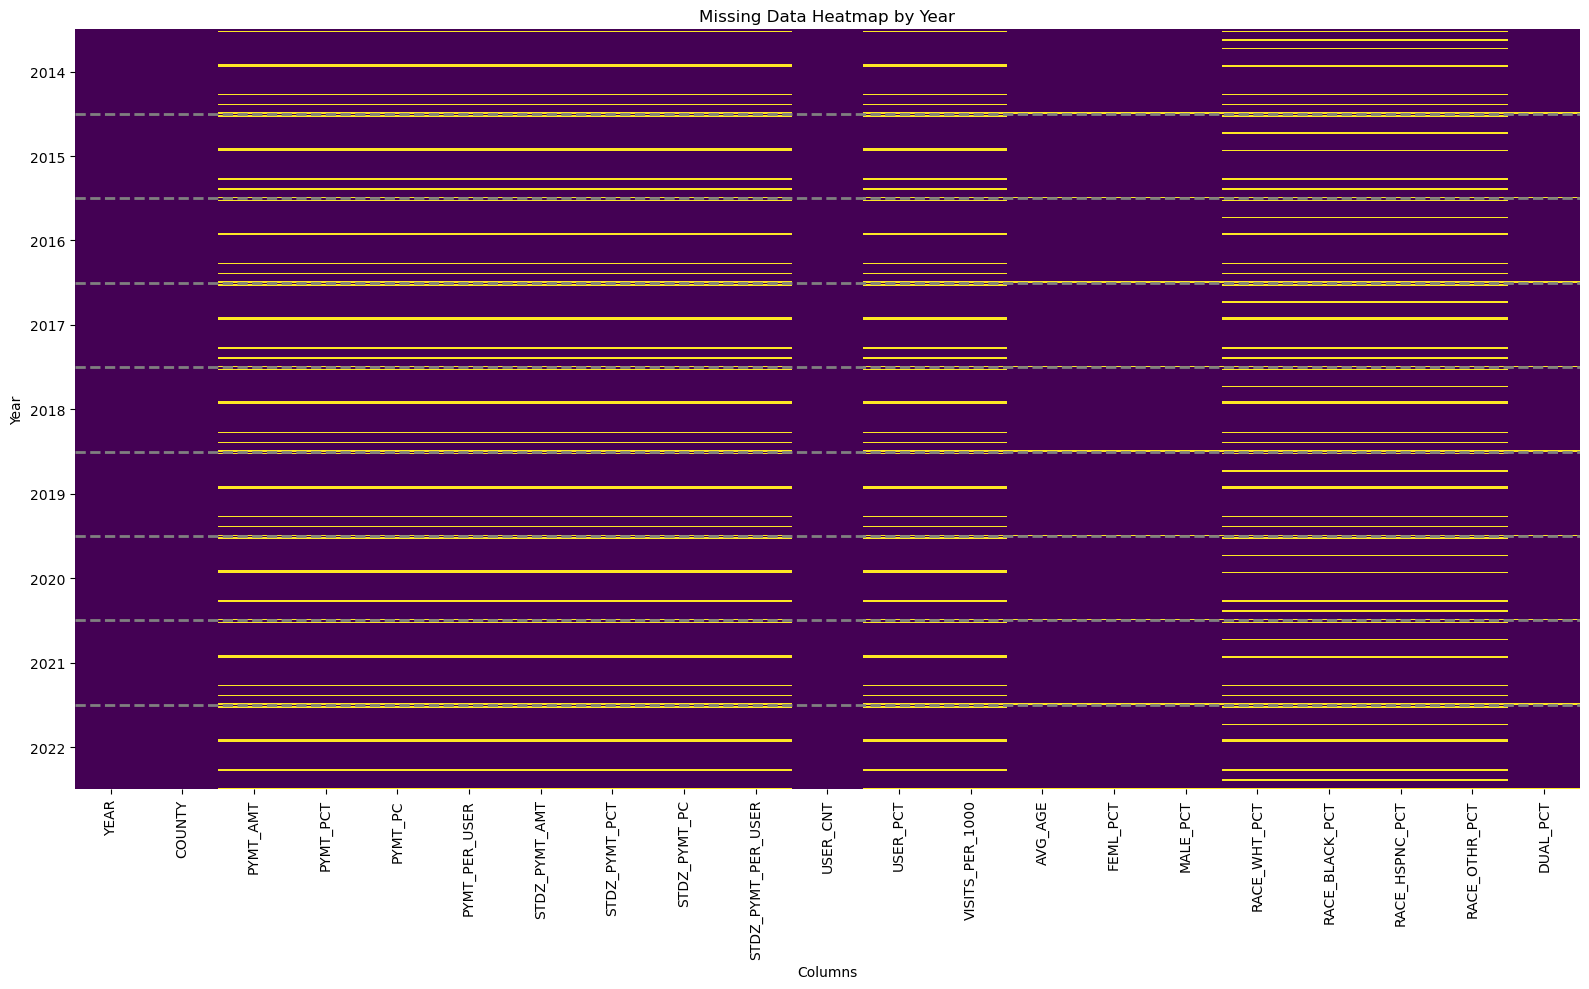

In [14]:
def plot_missing_data_heatmap(df):
    
    # Create the heatmap
    plt.figure(figsize=(16, 10))
    ax = sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

    # Add horizontal lines to separate years
    years = df['YEAR'].dropna().unique()
    year_indices = [df[df['YEAR'] == year].index[0] for year in years]
    for idx in year_indices[1:]:  # Start from the second year
        plt.axhline(y=idx, color='gray', linestyle='--', linewidth=2)

    # Set y-axis ticks and labels
    ax.set_yticks([idx + (year_indices[i+1] - idx)/2 if i+1 < len(year_indices) else idx + (len(df) - idx)/2 
                for i, idx in enumerate(year_indices)])
    ax.set_yticklabels([int(year) for year in years], rotation=0)  # Convert years to integers

    plt.title('Missing Data Heatmap by Year')
    plt.xlabel('Columns')
    plt.ylabel('Year')
    plt.tight_layout()
    return ax


g = plot_missing_data_heatmap(df_dial)
plt.show()

# # Create a mask of missing values, grouping by COUNTY
# missing_data = df_dial.isnull()

# # Plot the heatmap with COUNTY on the y-axis
# plt.figure(figsize=(12, 8))
# sns.heatmap(missing_data, cbar=False, cmap='viridis')
# plt.title('Missing Values by County')
# plt.xlabel('Columns')
# plt.show()

In [15]:
# Aggregate by 'COUNTY' and compute the mean of all other numerical columns, excluding 'YEAR'
df_dial_agg = df_dial.groupby(['YEAR', 'COUNTY']).mean(numeric_only=True).reset_index()

# Display the first few rows of the aggregated dataframe
df_dial_agg.head()

,YEAR,COUNTY,PYMT_AMT,PYMT_PCT,PYMT_PC,PYMT_PER_USER,STDZ_PYMT_AMT,STDZ_PYMT_PCT,STDZ_PYMT_PC,STDZ_PYMT_PER_USER,...,USER_PCT,VISITS_PER_1000,AVG_AGE,FEML_PCT,MALE_PCT,RACE_WHT_PCT,RACE_BLACK_PCT,RACE_HSPNC_PCT,RACE_OTHR_PCT,DUAL_PCT
0,2014,Alameda,44860311.11,0.0423,473.67,32366.75,34809758.15,0.0460,367.55,25115.27,...,0.0146,2090.8909,71.0,0.5428,0.4572,0.4848,0.1603,0.1196,0.2354,0.3397
1,2014,Alpine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,69.0,0.5699,0.4301,NaN,NaN,NaN,NaN,0.2694
2,2014,Amador,518681.43,0.0077,68.88,25934.07,438715.28,0.0084,58.26,21935.76,...,0.0027,437.8486,72.0,0.5278,0.4722,0.9284,0.0036,0.0408,0.0272,0.1251
3,2014,Butte,6445460.83,0.0156,147.62,24601.00,6033808.96,0.0172,138.19,23029.81,...,0.0060,786.7302,71.0,0.5400,0.4600,0.8939,0.0113,0.0571,0.0377,0.2407
4,2014,Calaveras,1262893.08,0.0150,129.41,28702.12,1111710.59,0.0176,113.92,25266.15,...,0.0045,737.1657,71.0,0.5134,0.4866,0.9186,0.0046,0.0488,0.0280,0.1381


## 5. Data Visualization
This section includes visualizations to explore data distributions and relationships between variables.

In [ ]:
# Plot distributions for selected columns
import seaborn as sns

df_ploy = df_dial_agg[df_dial_agg['YEAR'] == 2020].copy()
df_dial_agg.replace([np.inf, -np.inf], np.nan,inplace=True)
sns.pairplot(data=df_dial_agg)


C:\Users\Iris.Lin\AppData\Local\Temp\ipykernel_24204\3923456557.py:4: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)
c:\Users\Iris.Lin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Iris.Lin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Iris.Lin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. 

In [ ]:
df_agg_treemap = df_dial_agg.dropna()
df_agg_treemap.drop(df_agg_treemap[df_agg_treemap['USER_CNT'] == 0].index, inplace=True)

fig = px.treemap(df_agg_treemap, path=['COUNTY'], values='USER_CNT',
                  color='STDZ_PYMT_PC', hover_data=df_dial_agg.columns,
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df_agg_treemap['STDZ_PYMT_PC'], weights=df_agg_treemap['USER_CNT']))
fig.show()

## 6. Export Cleaned Data

In [20]:
base_dir = os.path.dirname(os.path.dirname(os.getcwd()))
output_file = os.path.join(base_dir, '009_supplemental', 'cleaned data', 'MEDICARE_CLEANED.csv')

# Save the aggregated data to CSV
df_dial.to_csv(output_file, index=False)